Each project is going to be either an Expansion or a Replacement project with an associated set of assumptions regarding (1) the initial outlay, (2) annual after-tax operating cash flows, and (3) terminal year after-tax non-operating cash flows. 

The formulaic construction of each of these is relatively straight-forward, however, it is their construction and subsequent testing that is of primary interest. 

Therefore, we need to consider how exactly our series are constructed from the bottom up. 

The most basic unit would be to construct a simple list that is passed to the appropriate class as follows:

# Expansion

In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf

In [2]:
'''
The initial investment outlays are structured as (1) investments in new fixed capital and (2) investment in net
working capital. 

For example, let's say that our investment includes a $200,000 outlay which includes $25,000 for nondepreciable 
land, plus $175,000 for equipment that will be depreciated straight-line to zero over five years. 
'''

non_depreciable = 25000.00

depreciable = 175000.00

economic_life = 5.00

In [3]:
'''
The investment in net working capital is the net investment in short-term assets required for the investment. 

This is the investment in receivables and inventory needed, less teh short-term payables generated by 
the project. 

In this case, the project required $50,000 of current assets but generated $20,000 in current liabilities, 
resulting in a total investment in net working capital of $30,000.
'''

nwcinv = 30000.00

In [4]:
'''
Now, let's assume that each year, sales will be $220,000 and cash operating expenses will be $90,000. 

Annual depreciation for the $175,000 depreciable equipment is $35,000 (one-fifth of the cost). 

The result is an operating income before taxes of $95,000.

Income taxes at a 40 percent rate are 0.40 * $95,000 = $38,000. 

This leaves operating income after taxes of $57,000. 

Adding back the depreciation charge of $35,000 gives the annual after-tax operating cash flow of $92,000. 
'''

s = 220000.00
c = 90000.00
T = 0.40

In [5]:
'''
Finally, we turn to the terminal year non-operating cash flow.

At the end of year 5, the company will sell off the fixed capital assets. 

In this case, the fixed capital assets (including the land) are sold for $50,000, which represents a gain of 
$25,000 over the remaining book value of $25,000. 

The gain of $25,000 is taxed at 40 percent, resulting in a tax of $10,000. 

This leaves $40,000 for the fixed capital assets after taxes. 

Additionally, teh net working capital investment of $30,000 is recovered, as the short-term asssets (such as
inventory and receivables) and short-term liabilities (such as payables) are no longer needed for the project. 

Total terminal year non-operating cash flows are then $70,000. 
'''

sal = 50000.00

In [6]:
'''
Additionally, the investment project has a required rate of return of 10 percent. 

Discounting the future cash flows at 10 percent and subtracting the investment outlay gives us our NPV. 
'''

r = 0.10

In [7]:
class Expansion:
    
    def __init__(self, depreciable, non_depreciable, economic_life, nwcinv, s, c, T, sal):
        self.economic_life = economic_life
        self.outlay = (depreciable + non_depreciable) + nwcinv
        self.cf = (s - c - (depreciable / self.economic_life))*(1 - T) + (depreciable / self.economic_life)
        self.tnocf = sal + nwcinv - T*(sal - non_depreciable)
    
    def npv(self, r):
        cfs = 0
        for x in [x for x in range(1, int(self.economic_life) + 1)]:
            cfs += (self.cf / ((1 + r)**x))
            
        npv = -self.outlay + cfs + (self.tnocf / ((1 + r)**self.economic_life))
        
        return round(NPV)
    
    def irr(self):
        return round(npf.irr([-self.Outlay] + [self.CF]*(int(self.economic_life)-1) + [self.TNOCF]), 4)

In [8]:
project = Expansion(depreciable, non_depreciable, economic_life, nwcinv, s, c, T, sal)

In [9]:
project.outlay

230000.0

In [10]:
project.cf

92000.0

In [11]:
project.tnocf

70000.0

In [12]:
project.npv(r)

162217

In [13]:
project.irr()

0.2721

# Replacement

The only major difference here is that Sal_init and B_init are included and these relate to the salvage value at
initiation of the old equipment being replaced and it's corresponding book value for calculating taxes. 

The other differences are in the inputs, where the number is the difference between keeping the old equipment and using the new equipment, rather than the raw number. 

In [14]:
class Replacement:
    
    def __init__(self, old_equipment, new_equipment, nwcinv, T):
        
        self.outlay = new_equipment['acqu_cost'] + nwcinv - old_equipment['current_mv'] + T*(
            old_equipment['current_mv'] - old_equipment['current_bv']
        )
        
        self.sales = new_equipment['s'] - old_equipment['s']
        self.cost = new_equipment['c'] - old_equipment['c']
        self.dep = new_equipment['d'] - old_equipment['d']
        self.cf = (self.sales - self.cost - self.dep)*(1 - T) + self.dep
        
        self.salt = new_equipment['exp_sal'] - old_equipment['exp_sal']
        self.acc = new_equipment['acct_sal'] - old_equipment['acct_sal']
        self.tnocf = self.salt + NWCInv - T*(self.salt - self.acc)
        
        self.economic_life = new_equipment['life']
        
    def npv(self, r):
        cfs = 0
        for x in [x for x in range(1, int(self.economic_life) + 1)]:
            cfs += (self.cf / ((1 + r)**x))
            
        npv = -self.outlay + cfs + (self.tnocf / ((1 + r)**self.economic_life))
        
        return round(npv)
    
    def irr(self):
        return round(npf.irr([-self.outlay] + [self.cf]*(int(self.economic_life)-1) + [self.tnocf]), 4)

#### In principle, the cash flows relevant to an investing decision are the incremental cash flows: the cash flows the company realizes WITH the investment compared to the cash flows teh company would realize WITHOUT the investment. 

We use the term "replacement" loosely, primarily to indicate that the cash flow analysis is more complicated than it was for the simpler expansion decision. 

Assume we are considering the replacement of old equipment with new equipment that has more capacity and is less costly to operate as follows:

In [15]:
old_equipment = {
    'current_bv': 400000,
    'current_mv': 600000,
    'remaining_life': 10,
    's': 300000,
    'c': 120000,
    'd': 40000,
    'acct_sal': 0,
    'exp_sal': 100000,
}

In [16]:
new_equipment = {
    'acqu_cost': 1000000,
    'life': 10,
    's': 450000,
    'c': 150000,
    'd': 100000,
    'acct_sal': 0, 
    'exp_sal': 200000,
}

If the new equipment replaces the old equipment, an additional investment of $80,000 in NWC will be required. 

The tax rate is 30 percent, and the required rate of return is 8 percent. 

In [17]:
nwcinv = 80000
T = 0.30
r = 0.08

In [18]:
proj = Replacement(old_equipment, new_equipment, nwcinv, T)

In [19]:
proj.npv(r)

213907

In [20]:
proj.IRR()

0.1423

## Ranking Conflict Due to Differing CF Patterns

Because cash flow patterns will not be static in real life (like the above examples), our algorithm needs to take advantage of Python's capabilities with respect to libraries such as pandas, but also simplifying the algorithm for certain types of tasks. 

For example, the construction of cash flows could be one algorithm and the construction of NPV's and IRR's could take place upon a series. 

This would allow us to construct unique cash flow series outside of the core NPV, IRR, and comparison algorithm:

In [21]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [22]:
df = pd.DataFrame()

In [23]:
df['proj_A_CFs'] = pd.Series([-200, 80, 80, 80, 80])
df['proj_B_CFs'] = pd.Series([-200, 0, 0, 0, 400])

In [24]:
df

,proj_A_CFs,proj_B_CFs
0,-200,-200
1,80,0
2,80,0
3,80,0
4,80,400


In [25]:
def _npv(data: pd.Series, r: float):
    cfs = 0
    for x in [x for x in range(1, len(data))]:
        cfs += (data[x] / ((1.0 + r)**x))
        
    npv = data[0] + cfs
    
    return round(npv, 2)

In [26]:
[_npv(df[x], 0.10) for x in df.columns]

[53.59, 73.21]

In [27]:
def _irr(data: pd.Series):
    return round(npf.irr(data) * 100, 2)

In [28]:
[_irr(df[x]) for x in df.columns]

[21.86, 18.92]

As you can see we have a ranking conflict: 

NPV tells us to select project B while IRR tells us to select Project A. 

If the two projects were not mutually exclusive, you would invest in both because they are both profitable. However, you can choose either A (which has the higher IRR) or B (which has the higher NPV). 

Let's look at these projects graphically across a range of discount rates:

In [29]:
drs = [x/200 for x in list(range(0, 61, 1))]

In [30]:
npv_proj_A = [_npv(df['proj_A_CFs'], x) for x in drs]
npv_proj_B = [_npv(df['proj_B_CFs'], x) for x in drs]

In [31]:
proj_A = []
for x, y in zip(drs, npv_proj_A): proj_A.append((x, y))

In [32]:
proj_B = []
for x, y in zip(drs, npv_proj_B): proj_B.append((x, y))

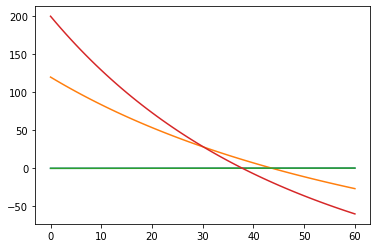

In [33]:
plt.plot(proj_A)
plt.plot(proj_B);

In [34]:
foo = [abs(x) for x in [x - y for x, y in zip(npv_proj_A, npv_proj_B)]]
bar = foo.index(min(foo))

print(proj_A[bar])
print(proj_B[bar])

(0.15, 28.4)
(0.15, 28.7)


We can now see graphically and given the intercept, that project B has the higher NPV for discount rates between 0 percent and 15 percent after which Project A has the higher NPV. 

The crossover point of around 15 percent corresponds to the discount rate at which both projects have the same NPV (roughly). 

Because the NPV criterion uses the most realistic discount rate - the opportunity cost of funds - the NPV criterion should be used for evaluating mutually exclusive projects. 

## Mulitple IRR and No IRR Problems

Now we demonstrate the multiple IRR and No IRR problems:

In [35]:
data = pd.DataFrame()

In [36]:
data['multi_irr'] = pd.Series([-1000, 5000, -6000])
data['no_irr'] = pd.Series([100, -300, 250])

In [37]:
data

,multi_irr,no_irr
0,-1000,100
1,5000,-300
2,-6000,250


These irregular cash flows should give rise to some issues when we analyze them deeply enough. 

Let's start with the multi-irr problem. 

The way this is made obvious is by testing the NPV of the cash flow on a huge range of discount rates and graphing them as follows: 

In [38]:
drs = [x/100 for x in list(range(0, 100000, 25))]

In [39]:
npv_multi = [_npv(data['multi_irr'], x) for x in drs]

In [40]:
multi = []
for x, y in zip(drs, npv_multi): multi.append((x, y))

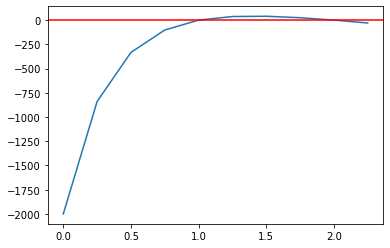

In [41]:
plt.plot(drs[0:10], npv_multi[0:10])
plt.axhline(y=0, color='r');

In [42]:
npv_no = [_npv(data['no_irr'], x) for x in drs]

In [43]:
no = []
for x, y in zip(drs, npv_no): no.append((x, y))

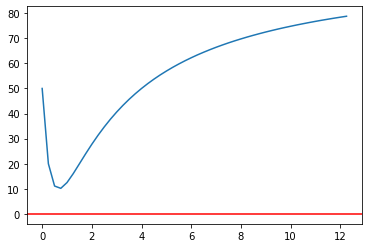

In [44]:
plt.plot(drs[0:50], npv_no[0:50])
plt.axhline(y=0, color='r');

### Depreciation

Many countries specify the depreciation methods that are acceptable for tax purposes in their jurisdictions. 

For example, in the United States, corporations use the MACRS (modified accelerated cost recovery system) for tax purposes. 

Under MACRS, real property (real estate) is usually depreciated straight-line over a 27.5- or 39-year life, and other capital assets are usually grouped into MACRS asset classes and subject to a special depreciation schedule in each class. 

These MACRS classes and the depreciation rates for each class are as follows: 

In [45]:
MACRS = {
    '3-year': [33.33, 44.45, 14.81, 7.41], 
    '5-year': [20.00, 3200, 19.20, 11.52, 11.52, 5.76],
    '7-year': [14.29, 24.49, 17.49, 12.49, 8.93, 8.93, 8.93, 4.45],
    '10-year': [10.00, 18.00, 14.40, 11.52, 9.22, 7.37, 6.55, 6.55, 6.55, 6.55, 3.29],
    '15-year': [5.00, 9.50, 8.55, 7.70, 6.93, 6.23, 5.90, 5.90, 5.90, 5.90, 5.90, 5.90, 5.90, 5.90, 5.90, 2.99],
    '20-year': [3.75, 7.22, 6.68, 6.18, 5.71, 5.28, 4.89, 4.52, 4.46, 4.46, 4.46, 4.46, 4.46, 4.46, 4.46, 4.46, 
                4.46, 4.46, 4.46, 4.46, 2.25],
}

In [46]:
assert len(MACRS['3-year']) == 4
assert len(MACRS['5-year']) == 6
assert len(MACRS['7-year']) == 8
assert len(MACRS['10-year']) == 11
assert len(MACRS['15-year']) == 16
assert len(MACRS['20-year']) == 21

For the first four MACRS classes, the depreciation is double-declining-balance with a switch to straight-line when optimal and with a half-year convention. 

For the last two classes, the depreciation is 150 percent-declining-balance with a switch to straight-line when optimal and with a half-year convention. 

Accelerated depreciation generally improves the NPV of a capital project compared to straight-line depreciation.

### Inflation

The cash flows and discount rate used should both be nominal or both be real in inflationary terms. 

It is perfectly fine either way but it just needs to match. 

The real rate, just like the real cash flows, has had the effect of inflation taken out. 

In general, the relationship between the real and nominal rates is: 

In [47]:
def nominal(real_rate: float, inflation_rate: float):
    
    nominal_rate = (1 + real_rate)*(1 + inflation_rate) - 1
    
    return round(nominal_rate, 4)

In [48]:
nominal(0.1635, 0.0078)

0.1726

In [49]:
def real(nominal_rate: float, inflation_rate: float):
    
    real_rate = (1 + nominal_rate) / (1 + inflation_rate)
    
    return round(real_rate - 1, 4)

In [50]:
real(0.1726, 0.0078)

0.1635